In [ ]:
!pip install tf-nightly

     |████████████████████████████████| 521.9MB 34kB/s 
     |████████████████████████████████| 460kB 35.0MB/s 
     |████████████████████████████████| 3.0MB 37.9MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data();
#Normalize pixel vals
train_images, test_images = train_images/ 255.0, test_images/ 255.0

In [ ]:
model =  models.Sequential();
with tf.device("/gpu:0"):
  model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)));
  model.add(layers.MaxPool2D((2, 2)))
with tf.device("/gpu:1"):
  model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
  model.add(layers.MaxPool2D((2, 2)))
with tf.device("/gpu:2"):
  model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
  model.add(layers.Flatten())
with tf.device("/gpu:3"):
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
%%time
history = model.fit(train_images, train_labels,
                    epochs= 10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5446 - accuracy: 0.4376 - val_loss: 1.2431 - val_accuracy: 0.5497
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1618 - accuracy: 0.5885 - val_loss: 1.0914 - val_accuracy: 0.6099
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0181 - accuracy: 0.6422 - val_loss: 1.0432 - val_accuracy: 0.6364
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9206 - accuracy: 0.6793 - val_loss: 0.9317 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8461 - accuracy: 0.7041 - val_loss: 0.9569 - val_accuracy: 0.6625
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7887 - accuracy: 0.7254 - val_loss: 0.8905 - val_accuracy: 0.6957
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7417 - accuracy: 0.7420 - val_loss: 0.8495 - val_ac

313/313 - 1s - loss: 0.8704 - accuracy: 0.7082


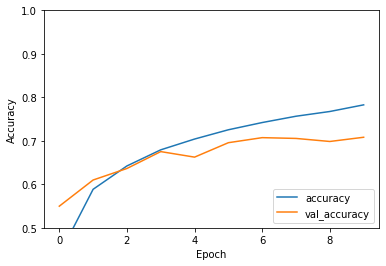

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
test_acc

0.7081999778747559